# Minería de datos en ciencias de materiales
- Fabián Castro Contreras 
- Sebastian Monteiro 
- Simón Campos Rojas 
- Dylan Riquelme  
- Benjamín Mancilla

## Problema y Motivación
La ciencia de materiales es un campo en constante evolución que desempeña un papel fundamental en la creación de tecnologías innovadoras y en la mejora de los materiales existentes para una amplia gama de aplicaciones. En este contexto, la minería de datos emerge como una poderosa herramienta que nos permite desentrañar patrones, descubrir relaciones y extraer información valiosa a partir de vastos conjuntos de datos relacionados con materiales.

Existen poderosas bases de datos que han utilizado algoritmos complejos y supercomputadoras para predecir propiedades de materiales. Una base de datos famosa y ampliamente utilizada debido a la calidad de sus datos es *Materials Project*, la cual presenta información de más de 150,000 materiales. Por lo tanto, encontrar patrones en las propiedades desemboca en un área para la minería de dtos.

## Materials Project
*Materials Project* cuenta con una API especialmente diseñada para el acceso a esta base de datos no SQL escrita en MongoDB. Dado la vasta cantidad de datos, se presentará el código utilizado para extraer los datos, pero **NO se sugiere ejecutar este código** ya que tarda bastante en descargar todo.

La API utilizada se llama *mp_api* y puede ser instalada usando *pip*.

La base de datos contiene varias clases, las cuales hay que descargar una por una con las propiedades de interés.

In [6]:
# Librerías a utilizar
import pandas as pd
from mp_api.client import MPRester
import matplotlib.pyplot as plt

# 1-.Consiguiendo los datos:

En primera instancia, se obtiene una llave mediante una cuenta creada en la pagina de *Materials Project* para acceder a la base de datos de la misma, luego se descargan los datos y se almacenan en archivos .csv. Despues se crea un repositorio en *Github* con todos los datos, los requerimientos para el proyecto (librerias) y los archivos *.ipynb* para el futuro codigo. 

In [ ]:
api_key = "Dzhoeg8v6DxzxNhjhYjRosxnYIr5mT9i" #Key para acceder a la base de datos

# Propiedades de los materiales para las distintas clases
properties_mat = ["material_id", "composition", "volume", "density", "density_atomic"]
properties_thermo = ["material_id", "energy_per_atom", "formation_energy_per_atom", 
                     "equilibrium_reaction_energy_per_atom", "decomposition_enthalpy"
                    ]
properties_electro = ["material_id", "band_gap", "efermi", "is_metal", "is_stable"]
properties_magnetic = ["material_id", "is_magnetic", "exchange_symmetry", "num_magnetic_sites"]
properties_dielectric = ["material_id", "e_total", "e_ionic", "e_electronic", "n"]
properties_oxidate_states = ["material_id", "possible_species", "possible_valences", "average_oxidation_states"]


# Esta es la forma en que se descargan los datos de una clase, esto se repite con todas las clases.
with MPRester(api_key) as mpr:
    mat_doc = mpr.materials.search(fields = properties_mat)
    

df_mat = pd.DataFrame([material.__dict__ for material in mat_doc])
df_mat = df_mat[properties_mat]
df_mat.to_csv("mat_doc")




In [9]:
dielectric = pd.read_csv("dielectric_doc")
electronic = pd.read_csv("electronic_doc")
magnetic = pd.read_csv("magnetic_doc.csv")
material = pd.read_csv("mat_doc")
oxidation_states=pd.read_csv("oxidation_states_doc")
thermo = pd.read_csv("thermo_doc")

dataframes = [dielectric,electronic,magnetic,material,oxidation_states,thermo]

# 2-.  Limpieza de datos

Se realiza una limpieza de datos preliminar, que consistio en eliminar una columna repetida llamada *"Unnamed: 0"* (ID´s repetidos) y seleccionar bajo una intuicion fisica que atributos mantener XD. 

 Luego se procede a unir los dataframes mediante un merge, para facilitiar la exploracion de datos y la interpretacion de estos. Se lleva a cabo este procedimiento para realizar facilmente un analisis, al menos superficialmente.  

In [10]:
# Eliminamos la columna que tiene de nombre Unnamed: 0 
for i, df in enumerate(dataframes):
    if 'Unnamed: 0' in df.columns:
        dataframes[i] = df.drop(columns='Unnamed: 0')
dielectric = dataframes[0]
electronic = dataframes[1]
magnetic = dataframes[2]
material = dataframes[3]
oxidation_states = dataframes[4]
thermo = dataframes[5]

In [11]:
# Supongamos que tienes cinco DataFrames df1, df2, df3, df4 y df5

# Utiliza merge para combinar los DataFrames en uno solo
result = pd.merge(dielectric, electronic, on='material_id', how='inner')  
result = pd.merge(result, magnetic, on='material_id', how='inner')  
result = pd.merge(result, material, on='material_id', how='inner')  
result = pd.merge(result, oxidation_states, on='material_id', how='inner')  
result = pd.merge(result, thermo, on='material_id', how='inner')  

# Ahora, 'result' contiene el DataFrame combinado con base en 'material_id'


In [12]:
result

,material_id,e_total,e_ionic,e_electronic,n,band_gap,efermi,is_metal,is_magnetic,exchange_symmetry,...,volume,density,density_atomic,possible_species,possible_valences,average_oxidation_states,energy_per_atom,formation_energy_per_atom,equilibrium_reaction_energy_per_atom,decomposition_enthalpy
0,mp-28944,21.521069,13.942520,7.578549,2.752916,1.5135,1.973873,False,False,186,...,208.023425,5.939485,34.670571,"['Bi3+', 'Cl-', 'Te2-']","[3.0, 3.0, -2.0, -2.0, -1.0, -1.0]","{'Bi': 3.0, 'Te': -2.0, 'Cl': -1.0}",-3.902939,-0.958829,-0.051867,-0.051867
1,mp-28096,3.218928,0.598031,2.620897,1.618918,2.8804,-1.097983,False,False,43,...,465.547991,1.926612,29.096749,"['S+', 'Cl-']","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0,...","{'S': 1.0, 'Cl': -1.0}",-3.466514,-0.474021,-0.075092,-0.075092
2,mp-863678,10.737604,6.585117,4.152487,2.037765,1.6514,2.395559,False,False,146,...,261.201622,5.454615,13.060081,"['O2-', 'K+', 'Sb5+', 'Zn2+']","[1.0, 2.0, 2.0, 2.0, 2.0, 5.0, 5.0, 5.0, -2.0,...","{'K': 1.0, 'Zn': 2.0, 'Sb': 5.0, 'O': -2.0}",-5.816968,-1.922136,-0.022649,-0.022649
3,mp-10461,13.624477,9.998830,3.625647,1.904113,2.9095,2.551343,False,False,167,...,331.052135,5.052121,15.047824,"['O2-', 'Sb5+', 'Na+', 'Sr2+']","[1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 5.0, ...","{'Na': 1.0, 'Sr': 2.0, 'Sb': 5.0, 'O': -2.0}",-6.392569,-2.738011,-0.088787,-0.086070
4,mp-8756,8.849831,4.815258,4.034573,2.008625,2.5447,0.345471,False,False,129,...,146.040316,2.842588,24.340053,"['Li+', 'Se2-', 'K+']","[1.0, 1.0, 1.0, 1.0, -2.0, -2.0]","{'K': 1.0, 'Li': 1.0, 'Se': -2.0}",-3.542389,-1.370645,-0.034785,-0.034785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7285,mp-1080625,24.635555,19.865529,4.770026,2.184039,1.8424,1.909453,False,False,87,...,127.171597,6.063684,12.717160,"['O2-', 'Sr2+', 'Re7+', 'Li+']","[2.0, 2.0, 1.0, 7.0, -2.0, -2.0, -2.0, -2.0, -...","{'Sr': 2.0, 'Li': 1.0, 'Re': 7.0, 'O': -2.0}",-7.492309,-2.751052,-0.010585,-0.010585
7286,mp-1018098,34.849630,29.407904,5.441726,2.332751,1.1377,2.416219,False,False,166,...,119.424366,5.124717,29.856092,"['Ba2+', 'Br-', 'N3-']","[2.0, 2.0, -1.0, -3.0]","{'Ba': 2.0, 'Br': -1.0, 'N': -3.0}",-4.864812,-1.432944,-0.087352,-0.087352
7287,mp-1029679,18.585264,13.485661,5.099603,2.258230,2.6252,3.885747,False,False,7,...,516.487244,5.053269,14.346868,"['Ge4+', 'N3-', 'Ba2+']","[2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","{'Ba': 2.0, 'Ge': 4.0, 'N': -3.0}",-6.891897,-0.356057,-0.029995,-0.029995
7288,mp-754339,19.986930,14.709712,5.277218,2.297220,1.8125,3.310100,False,False,1,...,204.287878,6.175441,12.016934,"['Li+', 'O2-', 'Te6+', 'Sb5+', 'W6+']","[1.0, 5.0, 6.0, 6.0, 6.0, -2.0, -2.0, -2.0, -2...","{'Li': 1.0, 'Sb': 5.0, 'Te': 6.0, 'W': 6.0, 'O...",-6.709543,-1.730547,NaN,0.040831


Notar que cada columna es un atributo físico de los materiales . Al hacer merge, algunos materiales ya no aparecen en la lista (de hecho, hay pocos materiales que están en todas las dataframes). Se redujo la cantidad de filas de 150k a 7k . Este análisis se realiza para poder hacer una mirada superficial a las matrices de covarianza, correlación y stats varias. Mas adelante es posible que se trabaje con los dataframes por separado debido a la variedad de estructura entre los distintos materiales, o tambien de alguna forma establecer una estructura universal para poder realizar el merge, pero no perdiendo una cantidad de datos tan grandes.

Se obtienen 22 columnas al hacer merge entre los dataframes.

In [13]:
numeric_columns = result.select_dtypes(include=['number'])
numeric_columns.columns


Index(['e_total', 'e_ionic', 'e_electronic', 'n', 'band_gap', 'efermi',
       'exchange_symmetry', 'num_magnetic_sites', 'volume', 'density',
       'density_atomic', 'energy_per_atom', 'formation_energy_per_atom',
       'equilibrium_reaction_energy_per_atom', 'decomposition_enthalpy'],
      dtype='object')

In [14]:
numeric_columns.describe()

,e_total,e_ionic,e_electronic,n,band_gap,efermi,exchange_symmetry,num_magnetic_sites,volume,density,density_atomic,energy_per_atom,formation_energy_per_atom,equilibrium_reaction_energy_per_atom,decomposition_enthalpy
count,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,4647.000000,7290.000000
mean,50.920612,32.398492,18.522120,2.436020,2.336182,1.724809,94.329081,0.560494,289.837992,4.402732,18.878844,-5.782469,-1.733503,-0.125225,-0.075678
std,1655.107848,1487.919679,625.658741,3.549444,1.697134,2.388488,76.760838,1.642730,221.638154,1.862653,8.587621,1.714053,0.982938,0.348267,0.316180
min,1.155248,0.000000,-64.837332,0.000000,0.000000,-7.804680,1.000000,0.000000,11.286588,0.023670,5.643294,-11.047931,-4.491319,-4.427975,-4.427975
25%,7.931442,4.000849,2.940330,1.714739,1.003525,0.215491,15.000000,0.000000,143.530177,3.084127,12.598164,-7.131346,-2.500231,-0.100782,-0.078266
50%,11.662250,6.472804,4.264421,2.065047,1.991500,1.749932,72.000000,0.000000,233.974644,4.129389,15.950793,-5.739387,-1.686184,-0.041113,-0.023512
75%,19.016789,11.364285,6.558800,2.561015,3.418875,3.227443,164.000000,0.000000,367.666530,5.351808,23.677849,-4.422131,-0.925363,-0.016220,0.000381
max,126575.316823,126567.273642,46857.910510,216.466881,12.139100,11.149808,230.000000,24.000000,3998.471538,17.732855,132.548261,-0.219326,5.212425,0.000000,5.212425


Algo que notar de este análisis estadístico es la presencia de outliers en los atributos e_total , e_ionic , e_electronic y n tienen percentiles y maximos muy distantes, como también una desviación estándar mas alta. Análisis posteriores darán mas luz sobre que hacer con estos outliers.

In [15]:
# Calcula la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Calcula la matriz de covarianza
covariance_matrix = numeric_columns.cov()

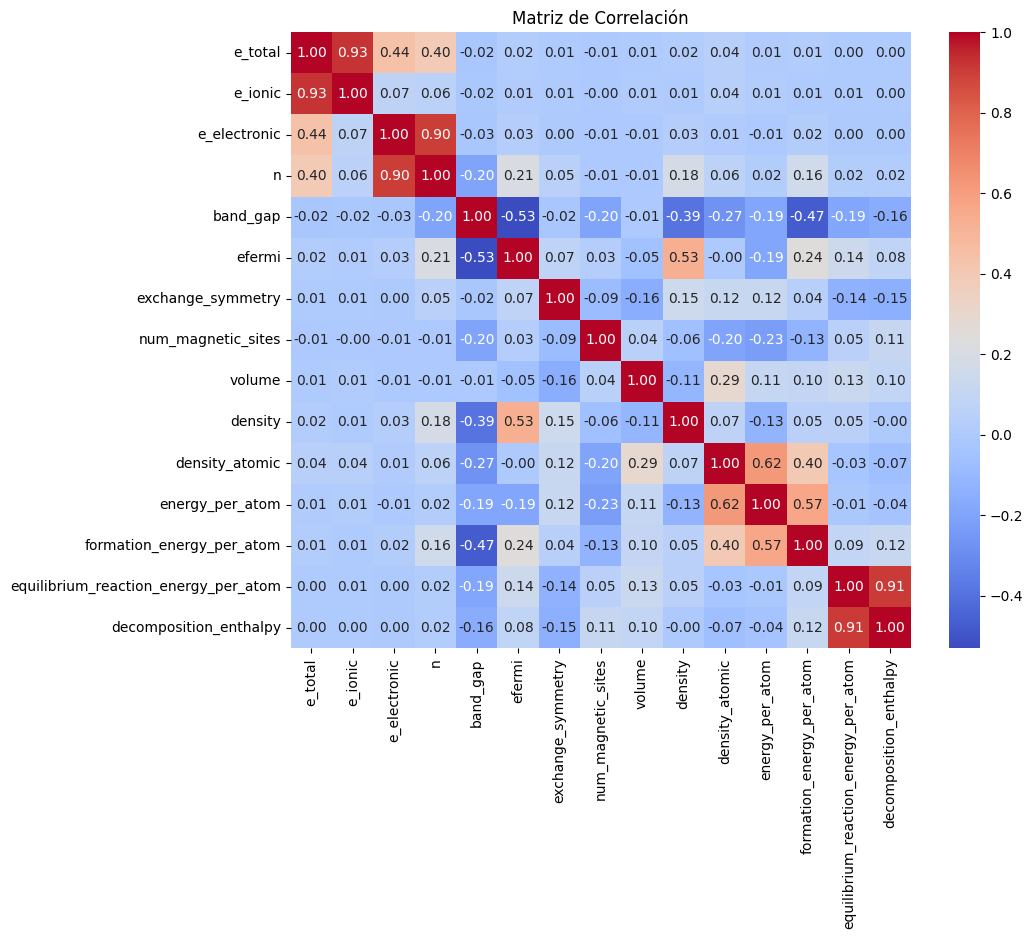

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Esta matriz de correlación indica varias cosas:
- Hay una gran correlación entre la energia de reacción en equilibrio y la entalpia de descomposicion (0.93)
- Entre la energía de fermi y la densidad hay una correlación interesante
- Entre la energía total y n hay correlación de 0.4 y entre e_total y e_electronic hay una correlación de 0.44
- Entre e_total y e_ionic hay una correlación de 0.93
Sobre las demás relaciones, hay muy poco mas que se pueda rescatar.

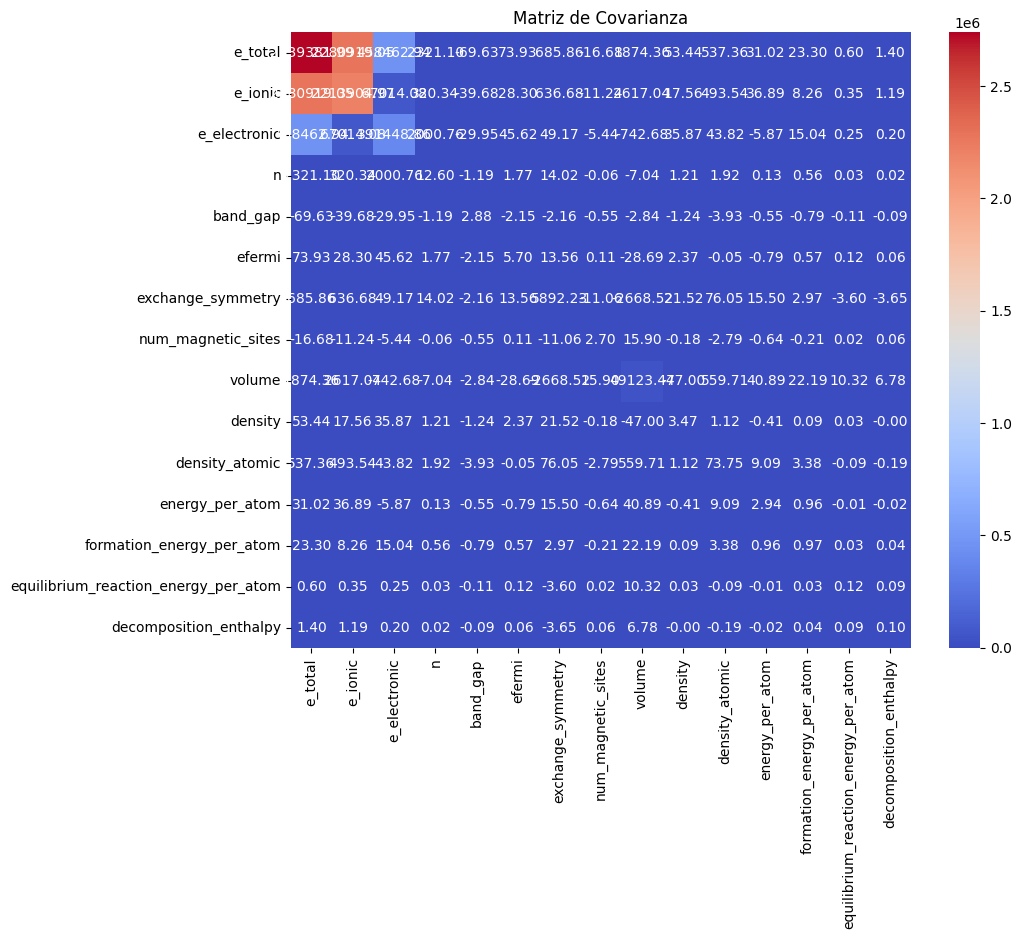

In [17]:
# Establecer el tamaño de la figura más grande
plt.figure(figsize=(10, 8))

# Visualizar la matriz de covarianza con un mapa de calor
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Covarianza")
plt.show()

De la matriz de covarianza no se puede extraer mucho mas

Para obtener una vista general de los datos de cada dataframe, primero se grafico en un histograma las frecuencias cada atributo. Para ello se evitaron aquellas columnas que contienen valores en string. Se dejo aparte el dataframe de oxidation_states, que no contiene valores numericos, y del dataframe material, la columna composition, que tiene la composicion quimica del material. Luego, se realizo un resumen estadistico de los atributos numericos. Calculando la cantidad de datos, media, desviacion estandar, minimo, los cuartiles y el maximo.

Análisis estadístico del DataFrame 0
Histograma de la columna e_total


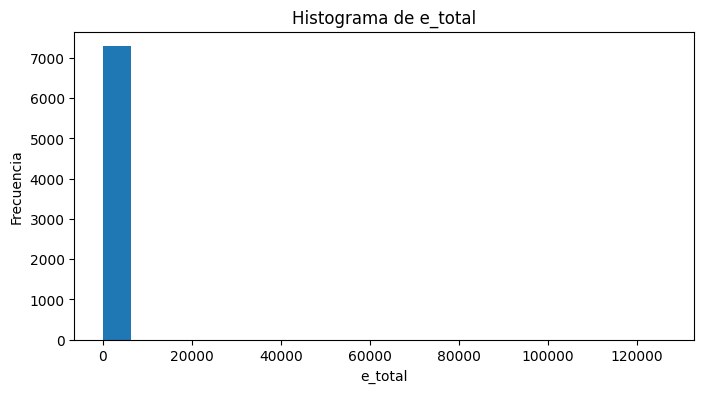

Histograma de la columna e_ionic


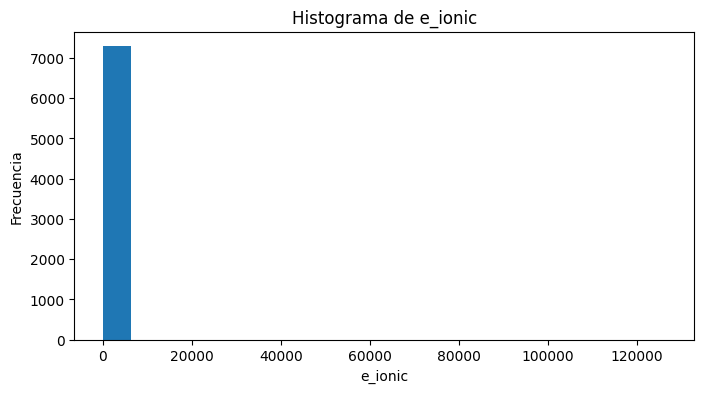

Histograma de la columna e_electronic


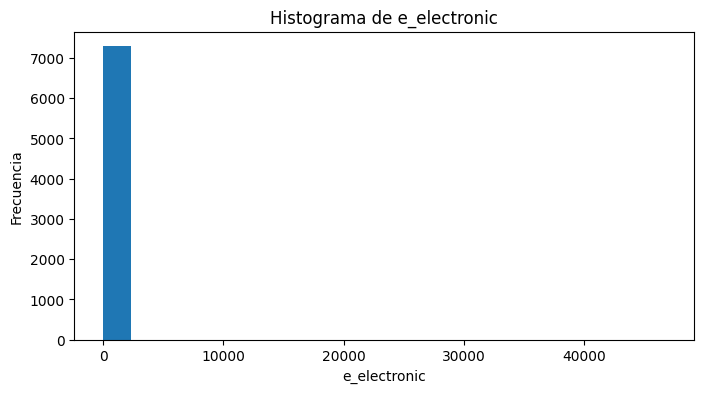

Histograma de la columna n


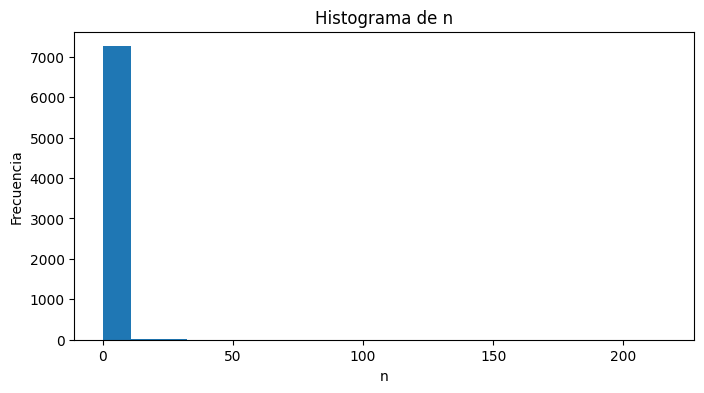

             e_total        e_ionic  e_electronic            n
count    7290.000000    7290.000000   7290.000000  7290.000000
mean       50.920612      32.398492     18.522120     2.436020
std      1655.107848    1487.919679    625.658741     3.549444
min         1.155248       0.000000    -64.837332     0.000000
25%         7.931442       4.000849      2.940330     1.714739
50%        11.662250       6.472804      4.264421     2.065047
75%        19.016789      11.364285      6.558800     2.561015
max    126575.316823  126567.273642  46857.910510   216.466881
Análisis estadístico del DataFrame 1
Histograma de la columna band_gap


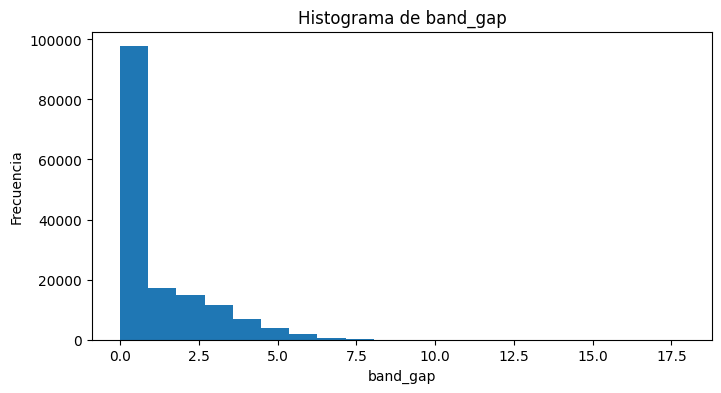

Histograma de la columna efermi


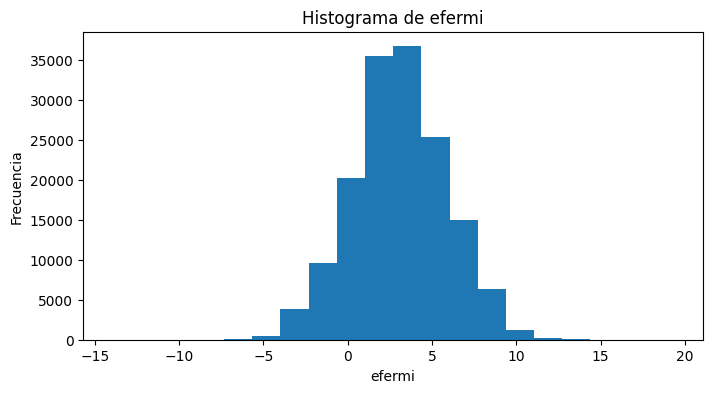

Histograma de la columna is_metal
            band_gap         efermi
count  154718.000000  154678.000000
mean        1.055169       3.068901
std         1.503758       2.772111
min         0.000000     -14.017281
25%         0.000000       1.268615
50%         0.083000       3.026354
75%         1.858600       4.902281
max        17.891400      19.414179
Análisis estadístico del DataFrame 2
Histograma de la columna is_magnetic
Histograma de la columna exchange_symmetry


<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

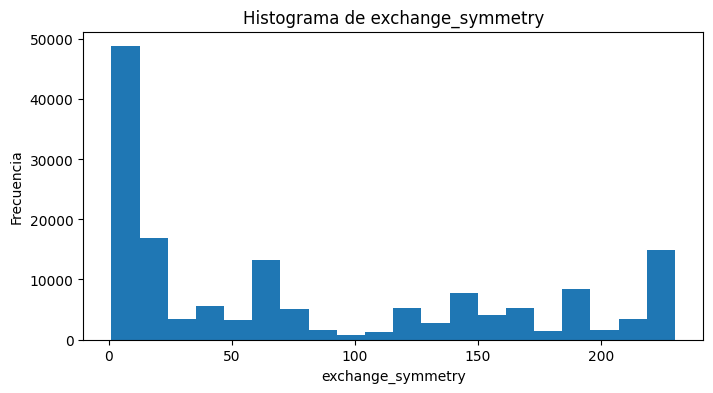

Histograma de la columna num_magnetic_sites


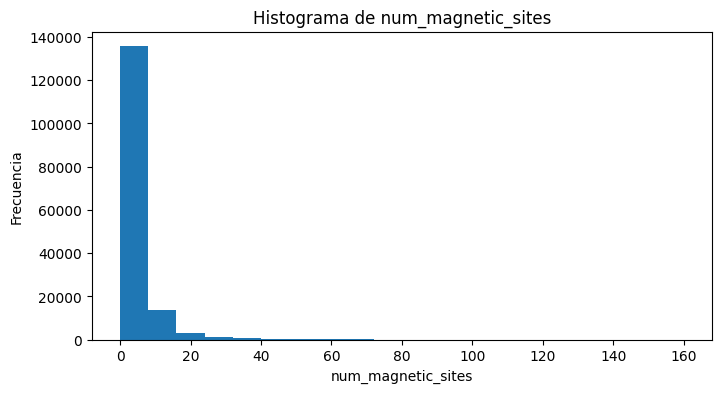

       exchange_symmetry  num_magnetic_sites
count      154718.000000       154718.000000
mean           80.047810            2.850522
std            80.426143            5.885730
min             1.000000            0.000000
25%             9.000000            0.000000
50%            57.000000            0.000000
75%           155.000000            4.000000
max           230.000000          160.000000
Análisis estadístico del DataFrame 3
Histograma de la columna volume


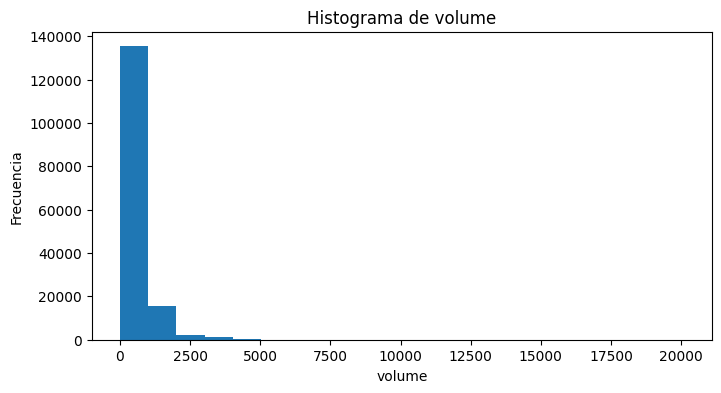

Histograma de la columna density


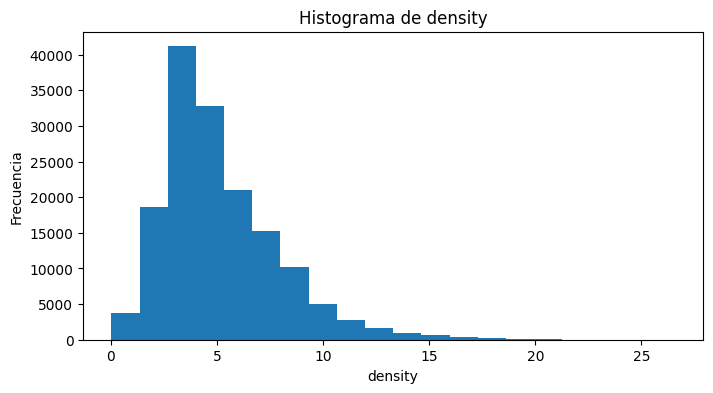

Histograma de la columna density_atomic


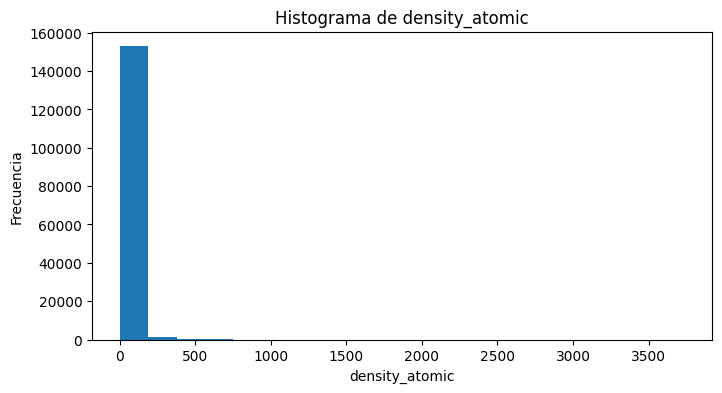

              volume        density  density_atomic
count  154718.000000  154718.000000   154718.000000
mean      514.611647       5.140905       21.829437
std       595.113052       2.761268       42.778600
min         5.610269       0.020144        4.361886
25%       173.012025       3.187203       12.311671
50%       320.761977       4.448522       14.998823
75%       625.560882       6.564731       21.018317
max     20090.906408      26.581336     3733.539490
Análisis estadístico del DataFrame 4
Análisis estadístico del DataFrame 5
Histograma de la columna energy_per_atom


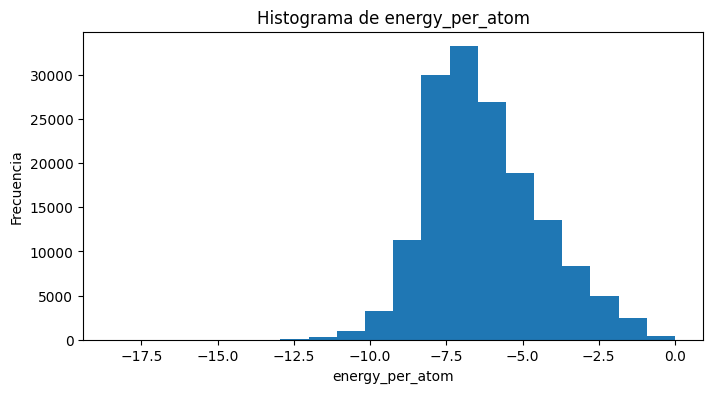

Histograma de la columna formation_energy_per_atom


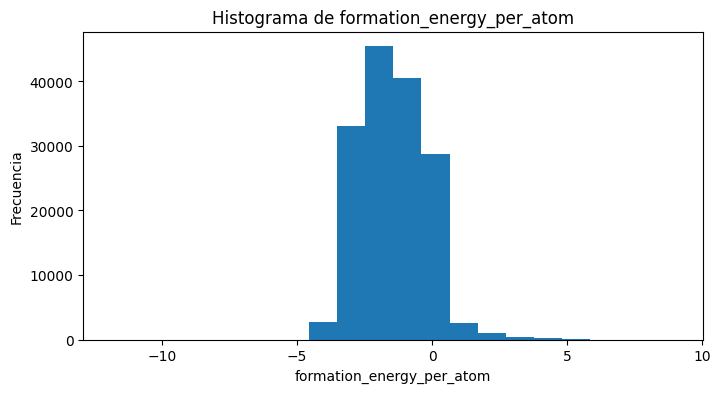

Histograma de la columna equilibrium_reaction_energy_per_atom


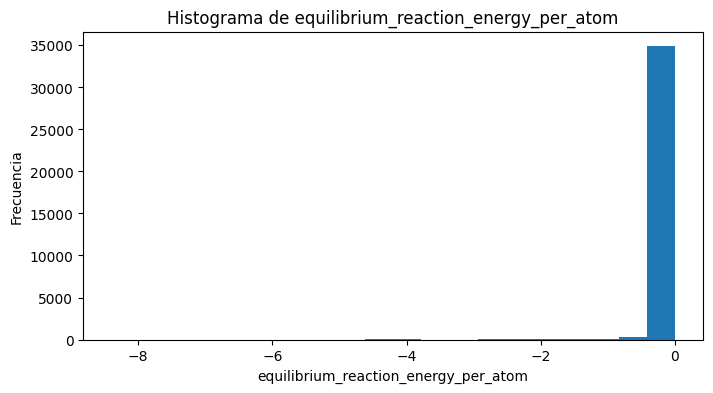

Histograma de la columna decomposition_enthalpy


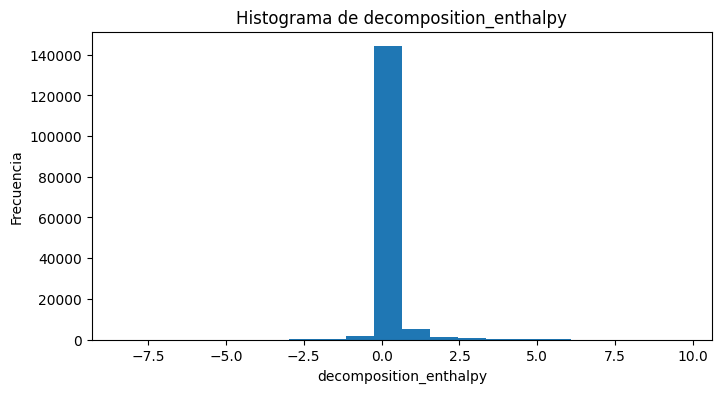

       energy_per_atom  formation_energy_per_atom  \
count    154718.000000              154718.000000   
mean         -6.265759                  -1.455087   
std           1.862117                   1.201848   
min         -18.488548                 -11.867881   
25%          -7.585424                  -2.434546   
50%          -6.516871                  -1.558728   
75%          -5.103024                  -0.499446   
max          -0.000760                   8.984754   

       equilibrium_reaction_energy_per_atom  decomposition_enthalpy  
count                          35463.000000           154718.000000  
mean                              -0.069510                0.149101  
std                                0.222408                0.479100  
min                               -8.400089               -8.400089  
25%                               -0.064231               -0.003721  
50%                               -0.028385                0.042637  
75%                             

In [19]:
import matplotlib.pyplot as plt

# Supongamos que tienes una lista de DataFrames llamada 'dataframes'
# Cada DataFrame en la lista representa un conjunto de datos

for i, df in enumerate(dataframes):
    print("Análisis estadístico del DataFrame " + str(i))
    for column in df.columns[1:]:
        if (df is oxidation_states) or (df is material and column == 'composition'):
            # Evita por completo el DataFrame oxidation_states y la columna 'composition' de material
            continue
        
        print("Histograma de la columna " + column)
        
        plt.figure(figsize=(8, 4))
        
        # Verificar si la columna contiene valores booleanos
        if df[column].dtype == bool:
            continue
        else:
            data_clean = df[column].dropna()  # Eliminar filas con NaN en la columna
            
            plt.hist(data_clean, bins=20)
        
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        
        # Opcional: Guardar los gráficos en archivos
        # plt.savefig(f'histogram_{i}_{column}.png')
        
        plt.show()
        
    if (df is oxidation_states):
        continue
    print(df.describe(include='number'))

Lo primero es notar es la presencia de la forma chi-cuadrado en algunos histogramas, como también algunas forma gaussianas. Estos histogramas permiten visualizar algunos thresholds para una futura limpieza de datos.

# Inquietudes a responder
- ¿Existen grupos de materiales con características similares?
- ¿Podemos encontrar materiales extraños, por ejemplo, material mágnetico que no sea metálico? 
- ¿Podemos identificar una caracteristica que influya en lo bueno que puede ser un conductor?

A continuación se mostrará una estrategia para hacer cada experimento e intentar responder las preguntas.


- ¿Existen grupos de materiales con características similares?

Al no tener labels, es directo que se va a usar clustering. Se probará con DBSCAN, con K-means y jerárquico.

Para el caso de k-means, se utilizará el método del codo.

DBSCAN no debería ser útil, debido a que aglomera usando las densidades, cosa que , por intuición fisica, no debería influir en el tipo de material, pero de todas maneras se realizará este análisis.


El clustering jerárquico también nos podría entregar un resultado interesante, ya que podrian haber subconjuntos de materiales.

Luego, una pregunta interesante es ver que característica es mas decididora para determinar la pertenencia de un punto a un clustering. Por ejemplo, si ploteamos los puntos con colores que dependen del valor de un atributo, y este color es muy intenso dentro de un cluster en particular, no sería descabellado pensar que esta característica influye bastante en este material y sus características.



- ¿Podemos identificar una caracteristica que influya en lo bueno que puede ser un conductor?



Primero, vamos a filtrar a todos los conductores usando el atributo band_gap  = 0 , esto pues se sabe que todos los conductores tienen este valor. Los semiconductores tienen un bandgap > 0 y los aislantes tienen band gap mucho mas grande. La siguiente imagen ejemplifica un material con band gap = 0 . 

Notar como en el grafico de la derecha, que muestra la densidad de estados, no hay saltos en la función de color rojo.

![Material con band gap = 0](band_gap1.png)

El siguiente material tiene un band gap distinto de cero, osea, los electrones necesitan un "empujoncito" para pasar de un estado ligado al estado libre de un conductor. Este empujoncito se puede conseguir con una diferencia de potencial o con el efecto túnel. Aquí la función roja no es contínua en todo el espacio, especificamente alrededor de 0.

![Material con band gap != 0](bandgap2.png)


Luego, debido a que no tenemos labels, clasificar no tendría sentido. Por esta razón , se realizará un clustering.

Primero, se probará con k-means . Para inspeccionar la cantidad idónea de clusters, se realizará la técnica del codo.

Con la cantidad de clusters obtenida, se realizará k-means. 

También se probará con DBSCAN. La intuición física nos dice que no servirá mucho, pues la densidad de puntos no debería ser un factor de clasificación.

El cluster que nos interesa es el jerárquico, pues queremos indentificar que tan buenos son los conductores. Queremos identificar alguna característica que tenga un gradiente que coincida con la forma en la que se agrupan los clusters. Una forma de visualizar esto sería algo como esto:

![EJEMPLO_CLUSTER](CLUSTER.png)

Notar como los puntos se vuelven mas rojos a medida que nos acercamos al centro, una especie de gradiente hacia el centro nos podría indicar que esta característica influye directamente en lo bueno (o malo) que es un conductor. Se utilizará PCA para dimensionar a un gráfico.

Posteriormente se realizará una validación de los métodos de clustering e intentaremos identificar alguna característica o estructura interesante.